In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
pd.set_option('display.float_format', '{:.2f}'.format)

### Import Dataset

In [3]:
df = pd.read_csv("https://s3.amazonaws.com/codecademy-content/programs/data-science-path/linear_regression/honeyproduction.csv")
df.sample(5)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
588,AR,25000.00,63,1575000.00,189000.00,1.98,3119000.00,2012
288,ND,390000.00,78,30420000.00,9126000.00,1.05,31941000.00,2004
307,FL,160000.00,86,13760000.00,2477000.00,0.87,11971000.00,2005
75,PA,28000.00,60,1680000.00,790000.00,0.76,1277000.00,1999
282,NE,51000.00,89,4539000.00,2043000.00,1.01,4584000.00,2004


### Data Information

In [4]:
# Rename Columns
df = df.rename(columns = {"state": "State",
                          "numcol": "Number of Colonies",
                          "yieldpercol": "Yield Per Colony",
                          "totalprod": "Total Production",
                          "stocks": "Stocks",
                          "priceperlb": "Price Per Pound",
                          "prodvalue": "Product Value",
                          "year": "Year"})

In [5]:
# Data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               626 non-null    object 
 1   Number of Colonies  626 non-null    float64
 2   Yield Per Colony    626 non-null    int64  
 3   Total Production    626 non-null    float64
 4   Stocks              626 non-null    float64
 5   Price Per Pound     626 non-null    float64
 6   Product Value       626 non-null    float64
 7   Year                626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [6]:
# Statistics
df.describe()

,Number of Colonies,Yield Per Colony,Total Production,Stocks,Price Per Pound,Product Value,Year
count,626.00,626.00,626.00,626.00,626.00,626.00,626.00
mean,60284.35,62.01,4169086.26,1318859.42,1.41,4715741.21,2004.86
std,91077.09,19.46,6883846.75,2272963.67,0.64,7976109.77,4.32
min,2000.00,19.00,84000.00,8000.00,0.49,162000.00,1998.00
25%,9000.00,48.00,475000.00,143000.00,0.93,759250.00,2001.00
50%,26000.00,60.00,1533000.00,439500.00,1.36,1841500.00,2005.00
75%,63750.00,74.00,4175250.00,1489500.00,1.68,4703250.00,2009.00
max,510000.00,136.00,46410000.00,13800000.00,4.15,69615000.00,2012.00


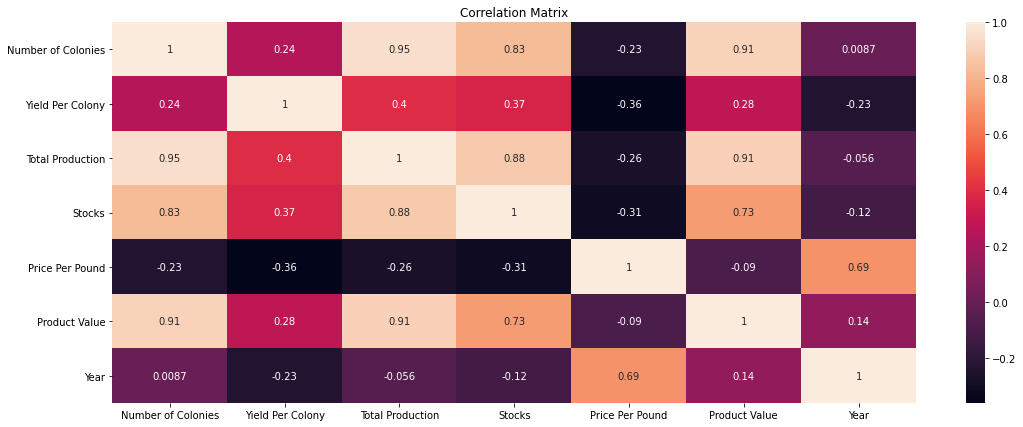

In [7]:
# Correlation
plt.figure(figsize = (18, 7))
correlation = df.corr()
sns.heatmap(correlation, annot = True)
plt.title("Correlation Matrix")
plt.show()

In [8]:
df = df[["State", "Year", "Number of Colonies", "Yield Per Colony", "Total Production", "Price Per Pound", "Product Value", "Stocks"]]
df.head()

,State,Year,Number of Colonies,Yield Per Colony,Total Production,Price Per Pound,Product Value,Stocks
0,AL,1998,16000.00,71,1136000.00,0.72,818000.00,159000.00
1,AZ,1998,55000.00,60,3300000.00,0.64,2112000.00,1485000.00
2,AR,1998,53000.00,65,3445000.00,0.59,2033000.00,1688000.00
3,CA,1998,450000.00,83,37350000.00,0.62,23157000.00,12326000.00
4,CO,1998,27000.00,72,1944000.00,0.70,1361000.00,1594000.00


### Data Analysis

**Lower Number of States by Honey Production Farms**

In [9]:
states = df["State"].value_counts().to_frame().reset_index().sort_values(by = "State").head(10)
states.columns = ["State", "Honey Farms"]
states

,State,Honey Farms
43,SC,3
42,MD,6
41,OK,6
40,NV,11
23,WV,15
24,PA,15
25,VA,15
26,IL,15
27,AL,15
28,OH,15


**Number of Honey Production Farms by Years**

In [10]:
years = df["Year"].value_counts().to_frame().reset_index()
years.columns = ["Year", "Honey Farms"]
years

,Year,Honey Farms
0,2003,44
1,2002,44
2,2001,44
3,2000,43
4,1999,43
5,1998,43
6,2008,41
7,2007,41
8,2006,41
9,2005,41


### State Analysis

**Top 10 Number of Colonies by States**

In [11]:
cs = df.groupby("State")["Number of Colonies"].agg(["sum", "min", "mean", "max"]).reset_index().sort_values(by = "sum", ascending = False).head(10)
cs.columns = ["State", "Total Colonies", "Min Colonies", "Avg Colonies", "Max Colonies"]
cs

,State,Total Colonies,Min Colonies,Avg Colonies,Max Colonies
3,CA,6100000.00,330000.00,406666.67,480000.00
23,ND,5555000.00,230000.00,370333.33,510000.00
34,SD,3544000.00,215000.00,236266.67,270000.00
5,FL,2928000.00,150000.00,195200.00,232000.00
21,MT,2040000.00,115000.00,136000.00,157000.00
18,MN,1934000.00,117000.00,128933.33,150000.00
9,ID,1491000.00,87000.00,99400.00,120000.00
36,TX,1478000.00,77000.00,98533.33,140000.00
17,MI,1067000.00,65000.00,71133.33,80000.00
41,WI,1022000.00,57000.00,68133.33,89000.00


**Top 10 Yield per Colony by States**

In [12]:
ycs = df.groupby("State")["Yield Per Colony"].agg(["sum", "min", "mean", "max"]).reset_index().sort_values(by = "sum", ascending = False).head(10)
ycs.columns = ["State", "Total Yields", "Min Yields", "Avg Yields", "Max Yields"]
ycs

,State,Total Yields,Min Yields,Avg Yields,Max Yields
7,HI,1470,74,98.00,136
14,LA,1436,77,95.73,124
23,ND,1321,69,88.07,128
20,MS,1312,65,87.47,118
5,FL,1246,61,83.07,105
41,WI,1191,60,79.40,95
21,MT,1160,52,77.33,122
34,SD,1137,47,75.80,121
18,MN,1114,53,74.27,90
1,AR,1109,57,73.93,98


**Top 10 Total Production by States**

In [13]:
ps = df.groupby("State")["Total Production"].agg(["sum", "min", "mean", "max"]).reset_index().sort_values(by = "sum", ascending = False).head(10)
ps.columns = ["State", "Total Production", "Min Production", "Avg Production", "Max Production"]
ps

,State,Total Production,Min Production,Avg Production,Max Production
23,ND,475085000.00,24000000.00,31672333.33,46410000.00
3,CA,347535000.00,11550000.00,23169000.00,37350000.00
34,SD,266141000.00,10575000.00,17742733.33,28435000.00
5,FL,247048000.00,10980000.00,16469866.67,24360000.00
21,MT,156562000.00,7540000.00,10437466.67,14030000.00
18,MN,144360000.00,6360000.00,9624000.00,13500000.00
36,TX,104904000.00,4524000.00,6993600.00,9380000.00
41,WI,81833000.00,3591000.00,5455533.33,8099000.00
17,MI,72820000.00,3960000.00,4854666.67,6800000.00
9,ID,66160000.00,2619000.00,4410666.67,6300000.00


**Lowest Price Per Pound by State**

In [14]:
pps = df.groupby("State")["Price Per Pound"].agg(["sum", "min", "mean", "max"]).reset_index().sort_values(by = "min").head(10)
pps.columns = ["State", "Total Price", "Min Price", "Avg Price", "Max Price"]
pps

,State,Total Price,Min Price,Avg Price,Max Price
14,LA,15.81,0.49,1.05,1.83
9,ID,17.07,0.52,1.14,1.78
1,AR,16.38,0.53,1.09,1.98
5,FL,16.51,0.53,1.10,1.84
20,MS,15.88,0.54,1.06,1.77
3,CA,17.00,0.55,1.13,1.94
28,NY,20.42,0.55,1.36,2.23
0,AL,21.28,0.56,1.42,2.51
36,TX,16.72,0.57,1.11,2.00
25,NJ,22.64,0.57,1.51,3.70


**Min Product Value by States**

In [15]:
pvs = df.groupby("State")["Product Value"].agg(["sum", "min", "mean", "max"]).reset_index().sort_values(by = "min").head(10)
pvs.columns = ["State", "Total Product Value", "Min Product Value", "Avg Product Value", "Max Product Value"]
pvs

,State,Total Product Value,Min Product Value,Avg Product Value,Max Product Value
15,MD,1833000.00,162000.00,305500.00,453000.00
16,ME,5067000.00,173000.00,337800.00,585000.00
13,KY,7199000.00,186000.00,479933.33,911000.00
33,SC,1338000.00,221000.00,446000.00,588000.00
25,NJ,9105000.00,235000.00,607000.00,1669000.00
39,VT,8435000.00,249000.00,562333.33,1139000.00
30,OK,1711000.00,253000.00,285166.67,362000.00
42,WV,8289000.00,255000.00,552600.00,838000.00
38,VA,8583000.00,287000.00,572200.00,807000.00
26,NM,8208000.00,295000.00,547200.00,881000.00


**Top Stocks by States**

In [16]:
ss = df.groupby("State")["Stocks"].agg(["sum", "min", "mean", "max"]).reset_index().sort_values(by = "sum", ascending = False).head(10)
ss.columns = ["State", "Total Stocks", "Min Stocks", "Avg Stocks", "Max Stocks"]
ss

,State,Total Stocks,Min Stocks,Avg Stocks,Max Stocks
23,ND,132898000.00,5962000.00,8859866.67,13800000.00
34,SD,131494000.00,2410000.00,8766266.67,13545000.00
3,CA,96807000.00,2109000.00,6453800.00,12326000.00
21,MT,47950000.00,1097000.00,3196666.67,5472000.00
41,WI,42726000.00,1508000.00,2848400.00,5264000.00
17,MI,34434000.00,1332000.00,2295600.00,3672000.00
5,FL,33144000.00,988000.00,2209600.00,4508000.00
18,MN,32787000.00,1110000.00,2185800.00,3300000.00
9,ID,28139000.00,530000.00,1875933.33,3110000.00
28,NY,26617000.00,936000.00,1774466.67,2470000.00


### Year Analysis

**Top 10 Number of Colonies by Year**

In [17]:
cy = df.groupby("Year")["Number of Colonies"].agg(["sum", "min", "mean", "max"]).reset_index().sort_values(by = "sum", ascending = False).head(10)
cy.columns = ["Year", "Total Colonies", "Min Colonies", "Mean Colonies", "Max Colonies"]
cy

,Year,Total Colonies,Min Colonies,Mean Colonies,Max Colonies
12,2010,2666000.00,4000.00,66650.00,510000.00
1,1999,2637000.00,3000.00,61325.58,465000.00
0,1998,2621000.00,3000.00,60953.49,450000.00
2,2000,2604000.00,4000.00,60558.14,440000.00
5,2003,2591000.00,2000.00,58886.36,480000.00
4,2002,2565000.00,3000.00,58295.45,470000.00
3,2001,2542000.00,4000.00,57772.73,460000.00
6,2004,2539000.00,5000.00,61926.83,390000.00
14,2012,2509000.00,4000.00,62725.00,480000.00
11,2009,2472000.00,5000.00,61800.00,450000.00


**Top 10 Yield per Colony by Year**

In [18]:
ycy = df.groupby("Year")["Yield Per Colony"].agg(["sum", "min", "mean", "max"]).reset_index().sort_values(by = "sum", ascending = False).head(10)
ycy.columns = ["Year", "Total Yields", "Min Yields", "Avg Yields", "Max Yields"]
ycy

,Year,Total Yields,Min Yields,Avg Yields,Max Yields
0,1998,3008,26,69.95,128
4,2002,2939,38,66.80,136
2,2000,2906,21,67.58,121
3,2001,2840,20,64.55,106
1,1999,2815,22,65.47,114
5,2003,2752,19,62.55,114
6,2004,2657,27,64.80,105
7,2005,2635,26,64.27,131
8,2006,2536,23,61.85,98
10,2008,2501,29,61.00,98


**Top 10 Total Production by Year**

In [19]:
py = df.groupby("Year")["Total Production"].agg(["sum", "min", "mean", "max"]).reset_index().sort_values(by = "sum", ascending = False).head(10)
py.columns = ["Year", "Total Production", "Min Production", "Avg Production", "Max Production"]
py

,Year,Total Production,Min Production,Avg Production,Max Production
2,2000,219558000.00,192000.00,5106000.00,34500000.00
0,1998,219519000.00,150000.00,5105093.02,37350000.00
1,1999,202387000.00,150000.00,4706674.42,27900000.00
3,2001,185748000.00,184000.00,4221545.45,28060000.00
6,2004,182729000.00,217000.00,4456804.88,30420000.00
5,2003,181372000.00,84000.00,4122090.91,32160000.00
12,2010,175294000.00,185000.00,4382350.00,46410000.00
7,2005,173969000.00,208000.00,4243146.34,33670000.00
4,2002,171265000.00,138000.00,3892386.36,24000000.00
10,2008,162972000.00,156000.00,3974926.83,36000000.00


**Lowest Price Per Pound by Year**

In [20]:
pps = df.groupby("Year")["Price Per Pound"].agg(["sum", "min", "mean", "max"]).reset_index().sort_values(by = "min").head(10)
pps.columns = ["Year", "Total Price", "Min Price", "Avg Price", "Max Price"]
pps

,Year,Total Price,Min Price,Avg Price,Max Price
1,1999,34.58,0.49,0.80,1.64
2,2000,34.03,0.52,0.79,1.50
0,1998,35.80,0.58,0.83,1.65
3,2001,40.12,0.60,0.91,2.14
7,2005,49.00,0.67,1.20,3.11
6,2004,52.67,0.79,1.28,2.10
8,2006,53.45,0.89,1.30,3.62
9,2007,58.97,0.91,1.44,2.99
4,2002,60.34,1.00,1.37,2.67
5,2003,65.77,1.20,1.49,2.04


**Min Product Value by Year**

In [21]:
pvy = df.groupby("Year")["Product Value"].agg(["sum", "min", "mean", "max"]).reset_index().sort_values(by = "min").head(10)
pvy.columns = ["Year", "Total Product Value", "Min Product Value", "Avg Product Value", "Max Product Value"]
pvy

,Year,Total Product Value,Min Product Value,Avg Product Value,Max Product Value
5,2003,252079000.00,162000.00,5729068.18,44702000.00
2,2000,131568000.00,173000.00,3059720.93,19665000.00
3,2001,132282000.00,174000.00,3006409.09,19361000.00
0,1998,146091000.00,179000.00,3397465.12,23157000.00
1,1999,123657000.00,186000.00,2875744.19,15797000.00
13,2011,258688000.00,238000.00,6467200.00,54542000.00
4,2002,227302000.00,259000.00,5165954.55,35040000.00
6,2004,197307000.00,278000.00,4812365.85,31941000.00
9,2007,161356000.00,309000.00,3935512.20,29837000.00
14,2012,280725000.00,325000.00,7018125.00,63590000.00


**Top Stocks by Years**

In [22]:
ss = df.groupby("Year")["Stocks"].agg(["sum", "min", "mean", "max"]).reset_index().sort_values(by = "sum", ascending = False).head(10)
ss.columns = ["Year", "Total Stocks", "Min Stocks", "Avg Stocks", "Max Stocks"]
ss

,Year,Total Stocks,Min Stocks,Avg Stocks,Max Stocks
2,2000,84956000.00,52000.00,1975720.93,13800000.00
0,1998,80565000.00,51000.00,1873604.65,12326000.00
1,1999,78390000.00,12000.00,1823023.26,13046000.00
3,2001,64764000.00,36000.00,1471909.09,12220000.00
7,2005,62187000.00,40000.00,1516756.10,11818000.00
6,2004,60981000.00,34000.00,1487341.46,13545000.00
8,2006,60235000.00,50000.00,1469146.34,10575000.00
9,2007,52405000.00,54000.00,1278170.73,10608000.00
10,2008,50996000.00,27000.00,1243804.88,11970000.00
12,2010,44797000.00,33000.00,1119925.00,12995000.00


### Deep Analyics

**Most Colonies Made by States in Years**

In [23]:
csy = df[["Year", "State", "Number of Colonies"]].sort_values(by = "Number of Colonies", ascending = False)
csy = csy.drop_duplicates("Year", keep = "first")
csy.sort_values(by = "Year")

,Year,State,Number of Colonies
3,1998,CA,450000.00
46,1999,CA,465000.00
89,2000,CA,440000.00
132,2001,CA,460000.00
176,2002,CA,470000.00
220,2003,CA,480000.00
264,2004,CA,390000.00
305,2005,CA,400000.00
346,2006,CA,380000.00
411,2007,ND,420000.00


**Most Yields per Colony Made by States in Years**

In [24]:
ysy = df[["Year", "State", "Yield Per Colony"]].sort_values(by = "Yield Per Colony", ascending = False)
ysy = ysy.drop_duplicates("Year", keep = "first")
ysy.sort_values(by = "Year")

,Year,State,Yield Per Colony
28,1998,ND,128
57,1999,LA,114
119,2000,SD,121
143,2001,LA,106
180,2002,HI,136
224,2003,HI,114
292,2004,SD,105
309,2005,HI,131
361,2006,MS,98
402,2007,MS,92


**Price Per Pound in States by Years**

In [25]:
psy = df[["Year", "State", "Price Per Pound"]].sort_values(by = "Price Per Pound")
psy = psy.drop_duplicates("Year", keep = "first")
psy = psy.sort_values(by = "Year")
psy

,Year,State,Price Per Pound
19,1998,MS,0.58
57,1999,LA,0.49
100,2000,LA,0.52
143,2001,LA,0.60
197,2002,NJ,1.00
242,2003,NM,1.20
275,2004,LA,0.79
320,2005,MS,0.67
345,2006,AR,0.89
402,2007,MS,0.91


**Product Value in State by Years**

In [26]:
psy = df[["Year", "State", "Product Value"]].sort_values(by = "Product Value")
psy = psy.drop_duplicates("Year", keep = "first")
psy = psy.sort_values(by = "Year")
psy

,Year,State,Product Value
15,1998,ME,179000.00
56,1999,KY,186000.00
101,2000,ME,173000.00
144,2001,ME,174000.00
203,2002,OK,259000.00
233,2003,MD,162000.00
276,2004,ME,278000.00
317,2005,ME,345000.00
366,2006,NJ,369000.00
399,2007,ME,309000.00


**Stocks in States by Years**

In [27]:
ssy = df[["Year", "State", "Stocks"]].sort_values(by = "Stocks", ascending = False)
ssy = ssy.drop_duplicates("Year", keep = "first")
ssy.sort_values(by = "Year")

,Year,State,Stocks
3,1998,CA,12326000.00
76,1999,SD,13046000.00
114,2000,ND,13800000.00
163,2001,SD,12220000.00
201,2002,ND,8160000.00
245,2003,ND,6803000.00
292,2004,SD,13545000.00
333,2005,SD,11818000.00
374,2006,SD,10575000.00
415,2007,SD,10608000.00


# Linear Regression

**Yields Per Colony by Year**

In [186]:
data = df.groupby("Year")["Yield Per Colony"].agg(["mean"]).reset_index()
data.columns = ["Year", "Average Yields Per Colony"]

In [187]:
X = data[["Year"]]
y = data["Average Yields Per Colony"]

In [188]:
lr = LinearRegression()

In [189]:
lr.fit(X, y)

LinearRegression()

In [190]:
y_predict = lr.predict(X)

In [191]:
X_future = np.array(range(2013, 2051))
X_future = X_future.reshape(-1, 1)
future_predict = lr.predict(X_future)

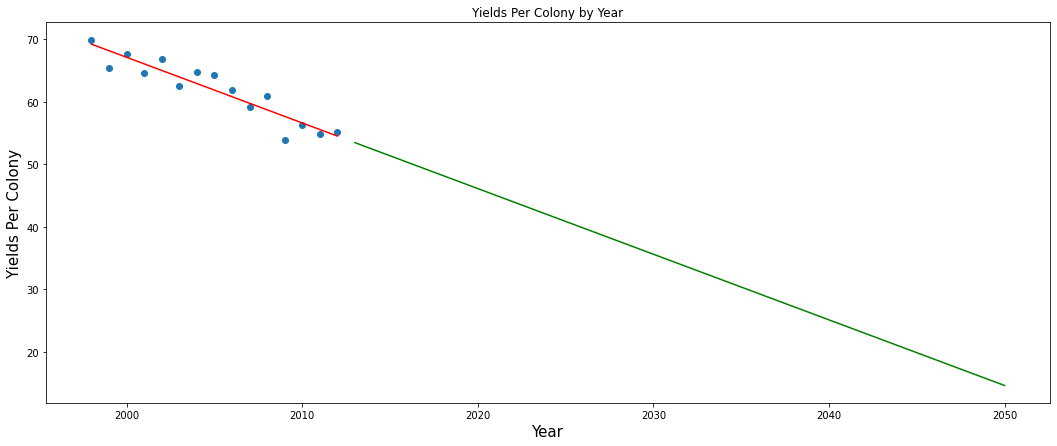

In [192]:
plt.figure(figsize = (18, 7))
plt.scatter(X, y)
plt.plot(X, y_predict, "r")
plt.plot(X_future, future_predict, "g")
plt.xlabel("Year", size = 15)
plt.ylabel("Yields Per Colony", size = 15)
plt.title("Yields Per Colony by Year")
plt.show()

**By using Polynomial Regression**

In [193]:
data = df.groupby("Year")["Yield Per Colony"].agg(["mean"]).reset_index()
data.columns = ["Year", "Average Yields Per Colony"]

In [195]:
X = data["Year"]
y = data["Average Yields Per Colony"]

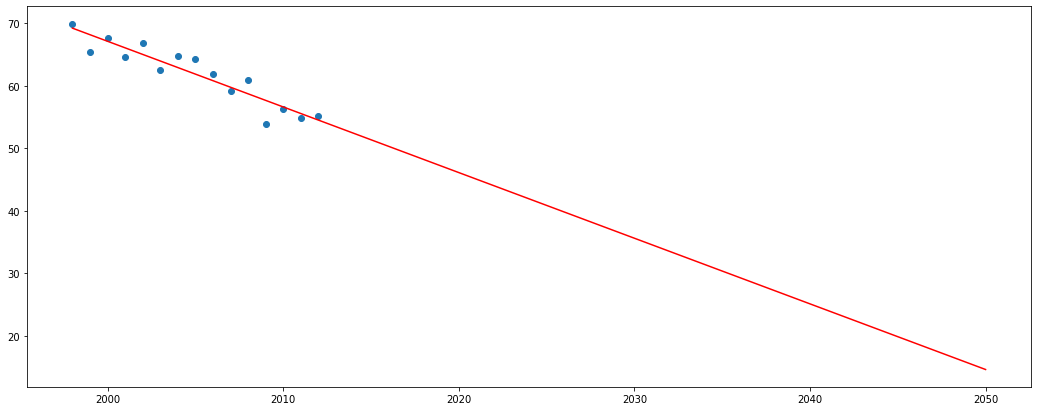

In [197]:
plt.figure(figsize = (18, 7))
mymodel = np.poly1d(np.polyfit(X, y, 1))
myline = np.array(range(1998, 2051))
plt.scatter(X, y)
plt.plot(myline, mymodel(myline), "r")
plt.show()

**Price Per Pound by Year**

In [158]:
ppy = df.groupby("Year")["Price Per Pound"].agg(["mean"]).reset_index()
ppy.columns = ["Year", "Average Price Per Pound"]

In [173]:
X = ppy["Year"]
y = ppy["Average Price Per Pound"]

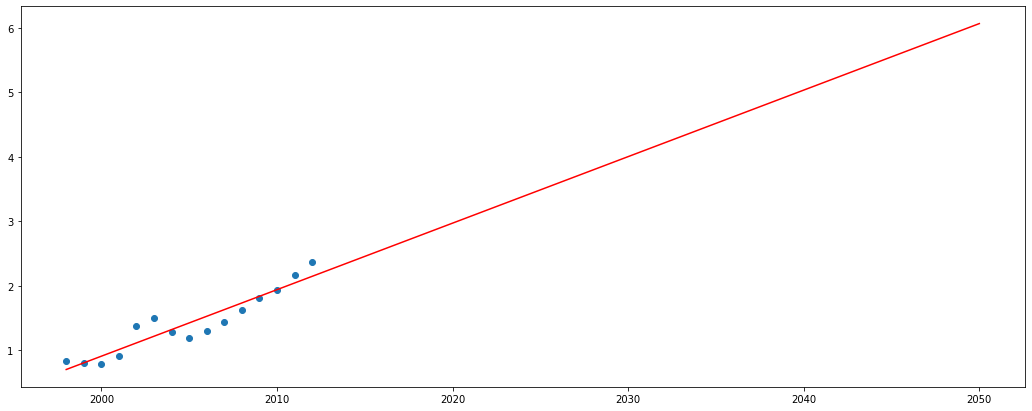

In [185]:
plt.figure(figsize = (18, 7))
mymodel = np.poly1d(np.polyfit(X, y, 1))
myline = np.array(range(1998, 2051))
plt.scatter(X, y)
plt.plot(myline, mymodel(myline), "r")
plt.show()

### Multiple Linear Regression

In [122]:
data = df.groupby("Year")[["Number of Colonies", "Yield Per Colony", "Price Per Pound"]].agg(["mean"])
data = data.droplevel(1, axis = 1)
data = data.reset_index()

In [123]:
X = data[["Year", "Number of Colonies", "Yield Per Colony"]]
y = data["Price Per Pound"]

In [124]:
lr = LinearRegression()

In [125]:
lr.fit(X, y)

LinearRegression()

In [126]:
yhat = lr.predict(X)

In [127]:
pd.DataFrame({"Actual": y, "Predicted": yhat}).head()

,Actual,Predicted
0,0.83,0.73
1,0.80,0.85
2,0.79,0.92
3,0.91,0.99
4,1.37,1.08


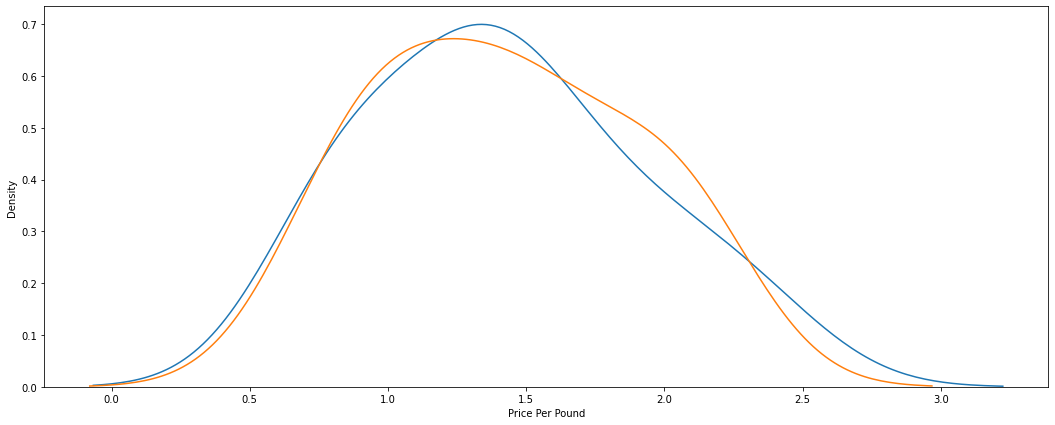

In [129]:
plt.figure(figsize = (18, 7))
sns.kdeplot(data = data, x = y)
sns.kdeplot(data = data, x = yhat)
plt.show()